In [17]:
%matplotlib notebook
import pandas as pd
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt

In [18]:
def get_past_yearly_refugees():
    past_filename = "demographics-and-locations-of-forcibly-displaced-and-stateless-persons-global-1.csv"
    past_df = pd.read_csv(past_filename, skiprows=[1])
    past_df = past_df[past_df["Country of Origin Name"] == "Ukraine"]
    refugees_year = past_df.groupby(["Year"]).sum()["Total"].astype(int)
    refugees_until_2014 = refugees_year[refugees_year.index < 2014].sum()
    print(refugees_until_2014) # total refugees from 2001 to 2013
    print(refugees_year[2014] / refugees_until_2014) # how bigger 2014 refugees are than 2001-2013
    return refugees_year
get_past_yearly_refugees()

636808
1.6891936030954384


Year
2001      32610
2002      90129
2003      96995
2004      92227
2005      86882
2006      67198
2007      28391
2008      30315
2009      26054
2010      26361
2011      26411
2012      26448
2013       6787
2014    1075692
2015    1943738
2016    2073715
2017    1977265
2018    1625206
2019    2502086
Name: Total, dtype: int64

In [19]:
def get_present_daily_refugees():
    present_filename = "By date (Cumulative).csv"
    present_df = pd.read_csv(present_filename, skiprows=[0], index_col=0)
    present_df.index = pd.to_datetime(present_df.index)
    present_df.index.name = "Date"
    return present_df["individuals"]
get_present_daily_refugees()

Date
2022-02-24      79982
2022-02-25     180950
2022-02-26     324059
2022-02-27     491603
2022-02-28     653356
2022-03-01     819228
2022-03-02     989500
2022-03-03    1173321
2022-03-04    1343402
2022-03-05    1540168
2022-03-06    1742688
2022-03-07    1948181
2022-03-08    2130351
2022-03-09    2298833
2022-03-10    2431450
2022-03-11    2550041
2022-03-12    2664171
2022-03-13    2788814
2022-03-14    2899770
2022-03-15    3007348
2022-03-16    3108615
2022-03-17    3192641
2022-03-18    3271682
2022-03-19    3344825
2022-03-20    3404588
2022-03-21    3463658
2022-03-22    3528369
2022-03-23    3590977
2022-03-24    3658174
2022-03-25    3720662
2022-03-26    3781632
2022-03-27    3838235
2022-03-28    3886797
2022-03-29    3929593
2022-03-30    3981534
2022-03-31    4035153
2022-04-01    4083796
2022-04-02    4134787
2022-04-03    4184651
2022-04-04    4229892
2022-04-05    4279617
2022-04-06    4335320
2022-04-07    4391316
2022-04-08    4450848
2022-04-09    4513521
2022-

636808
1.6891936030954384


<IPython.core.display.Javascript object>


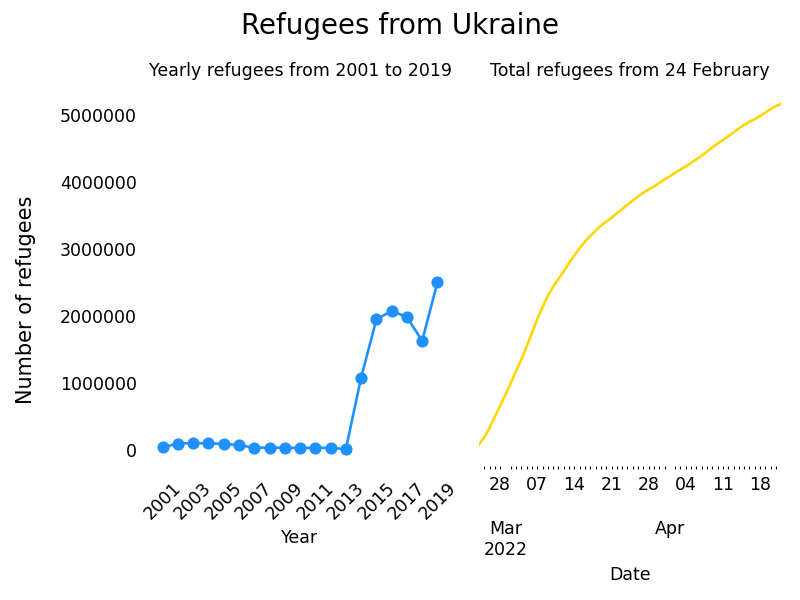

In [20]:
def fit_yearly_subplt(ax):
    ax.tick_params(axis='x', labelrotation=45)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_title("Yearly refugees from 2001 to 2019", fontsize=10)

def remove_heavy_elems(ax1, ax2):
    for a in (ax1, ax2):
        a.set_frame_on(False)
        a.tick_params(left = False, bottom = False)

def fit_plot(fig):
    fig.supylabel("Number of refugees")
    fig.suptitle('Refugees from Ukraine', fontsize=16)
    fig.tight_layout()

def plot():
    yearly_refugees = get_past_yearly_refugees()
    daily_refugees = get_present_daily_refugees()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    yearly_refugees.plot(ax=ax1, marker='o', color='dodgerblue', xticks=list(range(2001,2020,2)))
    daily_refugees.plot(ax=ax2, color='gold')
    
    fit_yearly_subplt(ax1)
    ax2.set_title("Total refugees from 24 February", fontsize=10)
    
    remove_heavy_elems(ax1, ax2)
    fit_plot(fig)
    plt.savefig('Refugees_Ukraine.png')
    
plot()